# Permutaciones Random

Con la ayuda de la función random que importamos al inicio en python, creamos una función que nos genere un vector con valores aleatorios que posteriormente vamos a organizar


In [17]:
import random
import matplotlib.pyplot as plt

def randomPerm(n): #Retorna un vector de numeros random
    v = []
    for i in range(n):
        v.append(i + 1)
    for i in range(len(v) - 1):
        j = random.randint(i, len(v) - 1)
        aux = v[i]
        v[i] = v[j]
        v[j] = aux
    return v


Tambien se crea una función que permita ordenar el vector que obtuvimos en el paso inmediatamente anterior

In [18]:

def isortSteps(a): #Ordena un vector
    v = []
    for i in range(len(a)):
        v.append(a[i])

    steps = 0
    for i in range(1, len(v)):
        x = v[i]
        j = i - 1
        while (j > -1) and (v[j] > x):
            v[j + 1] = v[j]
            j = j - 1
            steps = steps + 3
        steps = steps + 1
        v[j + 1] = x
        steps = steps + 4
    steps = steps + 1
    return steps


Cabe aclarar que  la función de ordenamiento nos devuelve la cantidad de pasos(comparaciones e intercambios) que tuvo que realizar el algoritmo para encontrar la solución. Y partir de eso se sacan algunas estadísticas como la cantidad minima, máxima y promedio de pasos para ordenar el vector generado aleatoriamente

In [19]:
n = int(input("Cantidad de elementos a ordenar: "))
runs = int(input("Numero de permutaciones: "))
lista = []
for i in range(runs):
    t = isortSteps(randomPerm(n))
    lista.append(t)

total = sum(lista)/runs
minimo = min(lista)
maximo = max(lista)
print("Numero minimo de instrucciones: %d" % minimo)
print("Numero maximo de instrucciones: %d" % maximo)
print("Numero promedio de instrucciones: %d" % total)


Cantidad de elementos a ordenar: 20
Numero de permutaciones: 40
Numero minimo de instrucciones: 267
Numero maximo de instrucciones: 462
Numero promedio de instrucciones: 371


Como ultimo paso se gráfica la distribución del numero de pasos empleados en cada una de las permutaciones

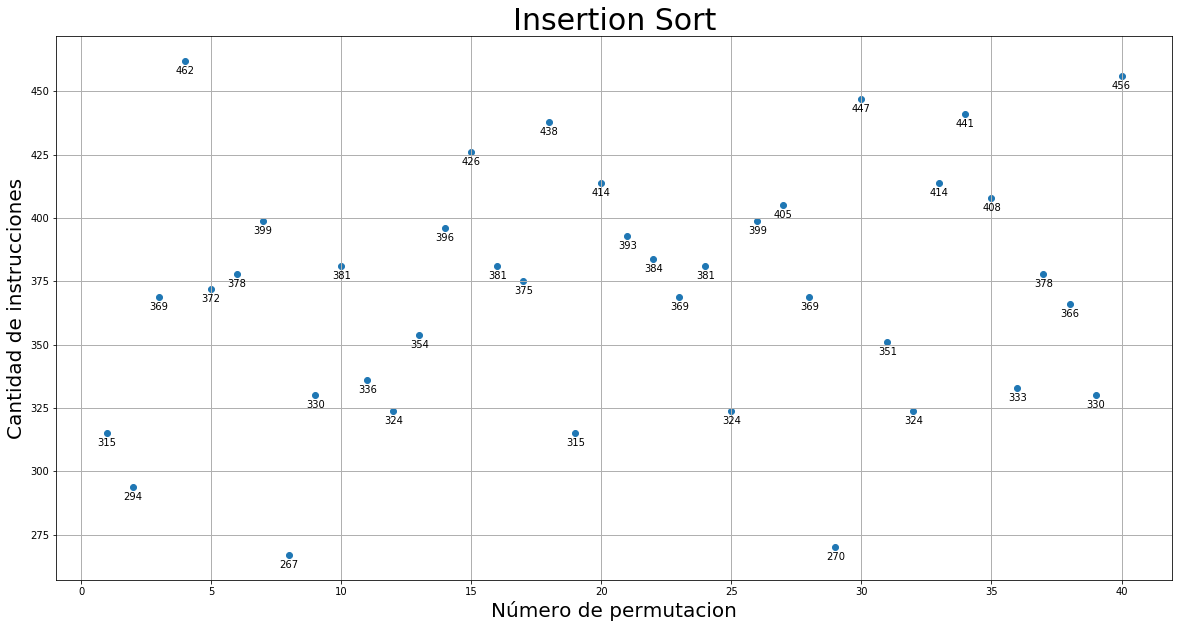

In [284]:
figura = plt.figure(figsize=(20,10))
ax = figura.add_subplot(111)
ax.set_xlabel('Número de permutacion',fontsize=20)
ax.set_ylabel('Cantidad de instrucciones',fontsize=20)
ax.set_title("Insertion Sort",fontsize=30)
ax.grid( linestyle='-', linewidth=1)
gra=[x for x in range(1,len(lista)+1)]
ax.scatter(gra,lista)
for i,txt in enumerate(gra):
    ax.annotate(lista[i], (gra[i],lista[i]),va='bottom',ha='center',xytext=(0, -15),textcoords='offset points')
    
plt.show()

Ahora se mostrara un histograma con la información anterior agrupada por intervalos para un mayor entendimiento

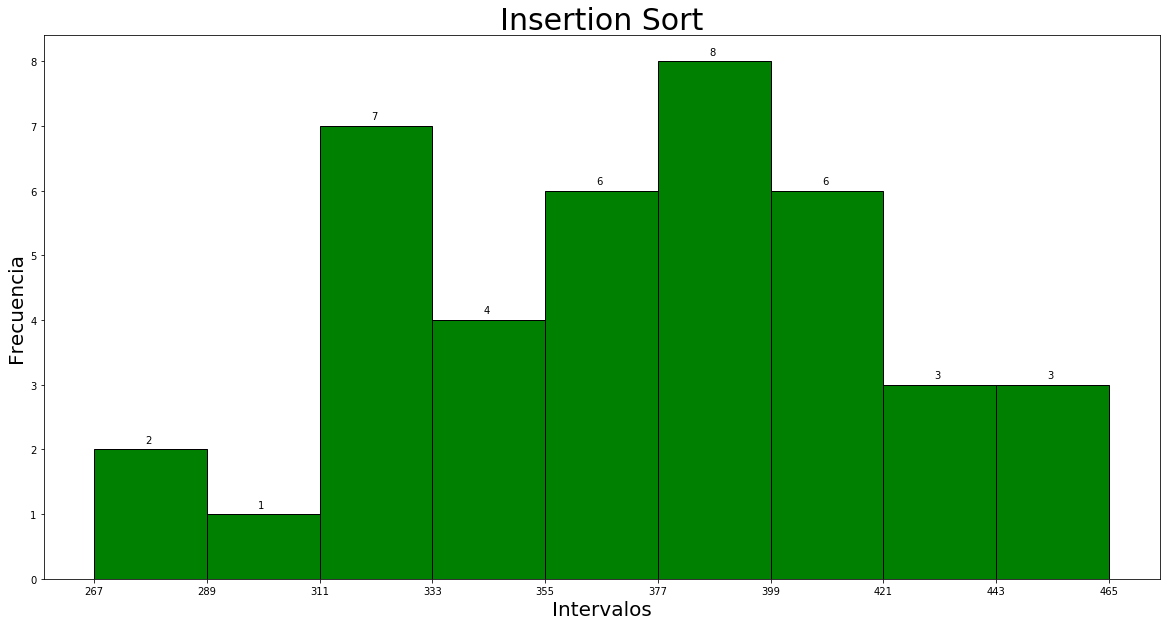

In [282]:
import math
import numpy as np
total= maximo-minimo
cantidad = math.ceil(1 + 3.3 *math.log10(total))
amplitud = math.ceil(total/cantidad)
alturas = []
figura = plt.figure(figsize=(20,10))
ax = figura.add_subplot(111)
ax.set_xlabel('Intervalos',fontsize=20)
ax.set_ylabel('Frecuencia',fontsize=20)
ax.set_title("Insertion Sort",fontsize=30)
ax.set_xticks([x for x in range(minimo,maximo+amplitud,amplitud)])
bins = [x for x in range(minimo,maximo+amplitud,amplitud)]
ax.hist(lista,bins,histtype='bar',edgecolor="black",color="green")
for i in ax.patches:
    a = int(i.get_height())
    alturas.append(a)
    ax.text(i.get_x()+10, i.get_height()+0.1,a)
plt.show()

El siguiente grafico muestra la probabilidad de que el numero de pasos necesarios para realizar insertion sort este dentro de alguno de los anteriores intervalos.


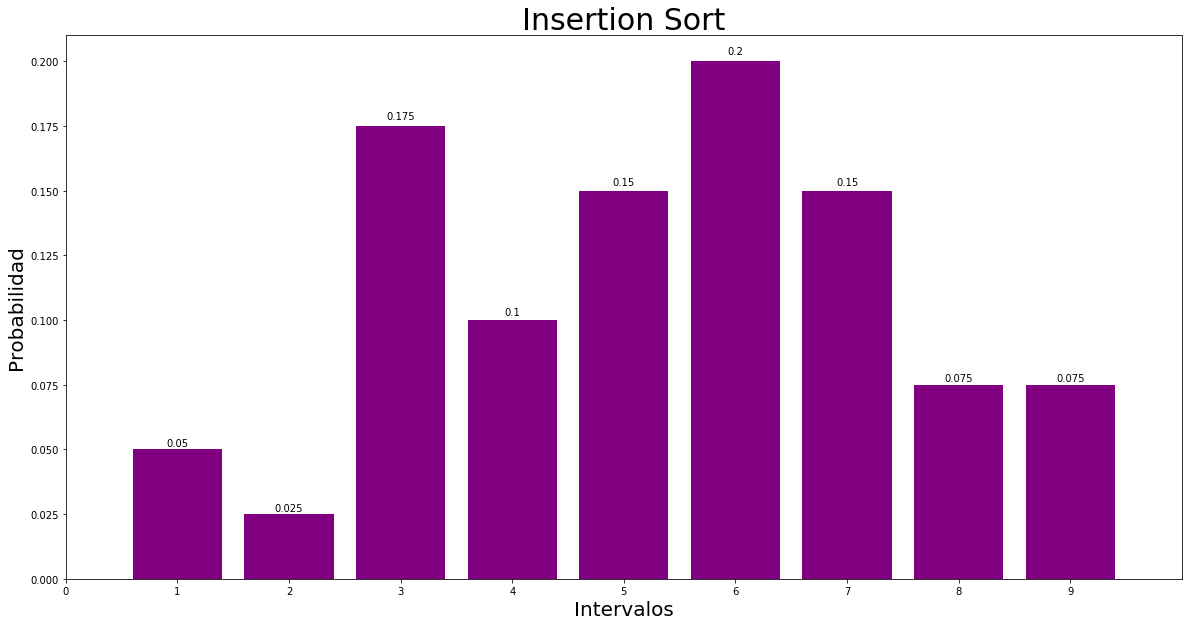

In [311]:
aux=[]
for i in range(len(alturas)):
    aux.append(alturas[i]/sum(alturas))
figura = plt.figure(figsize=(20,10))
mx = figura.add_subplot(111)
mx.set_xlabel('Intervalos',fontsize=20)
mx.set_ylabel('Probabilidad',fontsize=20)
mx.set_title("Insertion Sort",fontsize=30)
mx.set_xticks([x for x in range(0,len(aux)+1)])
plt.xlim(0,cantidad+1)
rect = mx.bar([x for x in range(1,len(aux)+1)],aux,color="purple")
for i in rect:
    height = i.get_height()
    if height==0.0:
        break
    mx.text(i.get_x() + i.get_width()/2., 1.01*height,height,ha='center', va='bottom')
plt.show()

**Nota:** Me base parcialmente en el codigo publicado en el mismo enunciado del problema